In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
# nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

In [3]:
# Term Document Matrix from text
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
# train_test_split, GridsearchCV
from sklearn.model_selection import train_test_split,GridSearchCV

In [5]:
# Decision Tree 
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [6]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
# Random Forests
from sklearn.ensemble import RandomForestClassifier
# Classification Metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [7]:
# Used yelp training dataset from kaggle
business = pd.read_json('yelp_training_set_business.json', lines=True)
review = pd.read_json('yelp_training_set_review.json', lines=True)
checkin = pd.read_json('yelp_training_set_checkin.json', lines=True)
user = pd.read_json('yelp_training_set_user.json', lines=True)

# Data Cleaning for Business Dataset

In [8]:
business.categories = business.categories.astype('str')

In [9]:
business['categories'] = business['categories'].str.replace( '[','')
business['categories'] = business['categories'].str.replace( ']','')

In [10]:
business.rename(columns={'review_count':'review_count_business','stars':'stars_business'}, inplace=True)

In [11]:
business.head(4)

,business_id,categories,city,full_address,latitude,longitude,name,neighborhoods,open,review_count_business,stars_business,state,type
0,rncjoVoEFUJGCUoC1JgnUA,"'Accountants', 'Professional Services', 'Tax S...",Peoria,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",33.581867,-112.241596,Peoria Income Tax Service,[],True,3,5.0,AZ,business
1,0FNFSzCFP_rGUoJx8W7tJg,"'Sporting Goods', 'Bikes', 'Shopping'",Phoenix,"2149 W Wood Dr\nPhoenix, AZ 85029",33.604054,-112.105933,Bike Doctor,[],True,5,5.0,AZ,business
2,3f_lyB6vFK48ukH6ScvLHg,,Phoenix,"1134 N Central Ave\nPhoenix, AZ 85004",33.460526,-112.073933,Valley Permaculture Alliance,[],True,4,5.0,AZ,business
3,usAsSV36QmUej8--yvN-dg,"'Food', 'Grocery'",Phoenix,"845 W Southern Ave\nPhoenix, AZ 85041",33.392210,-112.085377,Food City,[],True,5,3.5,AZ,business


In [12]:
business.shape

(11537, 13)

In [13]:
# Term Document Matrix for business categories
count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(','))
categories = count_vectorizer.fit_transform(business['categories'])
df_categories = pd.DataFrame(categories.toarray(), columns=count_vectorizer.get_feature_names())

In [14]:
business = business.drop('categories',1)
business_2 = pd.concat([business, df_categories],axis=1, join='inner')

In [15]:
business_2.head(4)

,business_id,city,full_address,latitude,longitude,name,neighborhoods,open,review_count_business,stars_business,...,'videographers','videos & video game rental','vietnamese','web design','wedding planning','weight loss centers','window washing','windows installation','wine bars','yoga'
0,rncjoVoEFUJGCUoC1JgnUA,Peoria,"8466 W Peoria Ave\nSte 6\nPeoria, AZ 85345",33.581867,-112.241596,Peoria Income Tax Service,[],True,3,5.0,...,0,0,0,0,0,0,0,0,0,0
1,0FNFSzCFP_rGUoJx8W7tJg,Phoenix,"2149 W Wood Dr\nPhoenix, AZ 85029",33.604054,-112.105933,Bike Doctor,[],True,5,5.0,...,0,0,0,0,0,0,0,0,0,0
2,3f_lyB6vFK48ukH6ScvLHg,Phoenix,"1134 N Central Ave\nPhoenix, AZ 85004",33.460526,-112.073933,Valley Permaculture Alliance,[],True,4,5.0,...,0,0,0,0,0,0,0,0,0,0
3,usAsSV36QmUej8--yvN-dg,Phoenix,"845 W Southern Ave\nPhoenix, AZ 85041",33.392210,-112.085377,Food City,[],True,5,3.5,...,0,0,0,0,0,0,0,0,0,0


# Data Cleaning for Review Dataset

In [16]:
review.sample(3)

,business_id,date,review_id,stars,text,type,user_id,votes
107196,uL_kqSm8ZqJ_3U88uwA8tw,2011-04-12,9qONSWY8p25x35Sk4SgZlA,4,Cool spot. Got some great cocktails before hea...,review,igDfq5yfudC_dzz1HAEQVg,"{'funny': 0, 'useful': 0, 'cool': 0}"
229385,qkbloHdDZuHf_0wTqUGPjQ,2010-04-01,m0dJBEy88_JWZyfYSFHxgQ,4,Beautiful outdoor space and excellent food. I ...,review,oYwxSpFA1dojx3Tl12992g,"{'funny': 0, 'useful': 0, 'cool': 0}"
39863,wN_wAXWg8W94v04eqijy6g,2012-03-24,5OK0yPw9nA45hUNFYnmknA,5,"This place is the bomb. Yup, I said it. I orde...",review,qRo9gHN5OiV1-peDuhCh-g,"{'funny': 1, 'useful': 1, 'cool': 0}"


In [17]:
votes = review['votes'].apply(pd.Series)
review = pd.concat([review, votes], axis=1).drop('votes', axis=1)
review.rename(columns={'date':'review_date','stars':'stars_review','cool':'cool_r','funny':'funny_r','useful':'useful_r'}, inplace=True)

In [18]:
review.sample(4)

,business_id,review_date,review_id,stars_review,text,type,user_id,cool_r,funny_r,useful_r
133068,EWMwV5V9BxNs_U6nNVMeqw,2009-02-11,MicFhSQIQ-RUAUTcEX0x_g,5,"I'm a pretty tough cookie to please, and I rar...",review,rd95Z-Z5OX0mTuiI_hlRhA,3,3,3
178517,P1R-DyUyBeWCvPKrRkglsQ,2008-09-09,NNsKFZA7pqSgfV-4uAS_fQ,4,Nothing like waking up at 5:30 am the day afte...,review,fczQCSmaWF78toLEmb0Zsw,13,4,10
204760,Nj6ITW0Zhl7LpovGIH6SAg,2009-11-16,1TASyOMdRpkgrCKI_qzx9g,3,****Warning***** \nBe prepared to throw down w...,review,_uL7OiQSfNsCd60DrAf7qQ,2,5,4
152008,WdpPGvnZ27jrSTXpYgSsDA,2011-06-20,Ef7t2mOj6sqdAmf7Xc1Tdg,4,This place had great Caribbean food. I would ...,review,5U0f_3zUi6Yy-bD6csyVjw,0,0,1


In [19]:
# Getting ratio of useful reviews / total reviews that a business has.
review_business_useful = ((review[review['useful_r']>0]).groupby('business_id')['useful_r'].count()).to_frame().reset_index()
review_business_total = (review.groupby('business_id')['useful_r'].count()).to_frame().reset_index()

In [20]:
review_4 = pd.merge(review_business_useful, review_business_total, on='business_id' )

In [21]:
review['useful_r_ratio'] = review_4['useful_r_x']/review_4['useful_r_y']
review['useful_r_ratio'] = review['useful_r_ratio'].fillna(0)

In [22]:
# Std. dev. of useful taken by user
review_user_std_dev = (review.groupby('user_id')['useful_r'].std()).to_frame().reset_index()
review= pd.merge(review, review_user_std_dev, on='user_id')

In [23]:
review['useful_r_y'] = review['useful_r_y'].fillna(0)

In [24]:
review.rename(columns={'useful_r_x':'useful_r','useful_r_y':'review_user_std_dev'}, inplace=True)

In [25]:
# number of ! and ?
review['count_exclamation'] = review['text'].str.count(r'!')

In [26]:
review['count_question'] = review['text'].str.count(r'\?')

In [27]:
# count of stopwords
stop_words = set(stopwords.words('english'))

In [28]:
tokenizer = RegexpTokenizer(r'\w+')

def count_non_stop_words(text):
    word_tokens = tokenizer.tokenize(text)
    filtered_words = [w for w in word_tokens if not w in stop_words]
    return len(filtered_words)

review['count_non_stop'] = review['text'].apply(count_non_stop_words)

In [29]:
review.sample(5)

,business_id,review_date,review_id,stars_review,text,type,user_id,cool_r,funny_r,useful_r,useful_r_ratio,review_user_std_dev,count_exclamation,count_question,count_non_stop
208587,T9BPnYNKtk6B42W0cJJXnA,2010-10-24,fEz6sa7CKXRYnSAU36F65A,5,The cookie Jar is a small family owned cafe in...,review,L2cd3wH0ACFDU7H6efVivA,0,0,0,0.0,0.000000,1,0,57
93112,wZwZcte4lcbu51NOzCjWbQ,2012-03-09,TS8Tjgv-jVAfC9CYCX7R3w,1,"Oh man.. well overpriced drinks, and small por...",review,IjafRfMSAQpInLlw-Vi0Cg,0,2,3,0.0,1.283015,4,0,270
201544,jWIdwys1qisHa93seORskQ,2011-11-13,MWJelV31jlXVaM6MZUa6Vg,5,These folks are very helpful and nice. I have...,review,WgYBmknfAwVULzqK__U0FQ,0,0,0,0.0,0.000000,0,0,8
216058,BZ5Fqx0dTwZgnLzCcMyJaQ,2012-03-10,3mpatAdyyRi5jVNKM4QNHA,5,The owners are amazing and if you become a reg...,review,QGYqh5zG732IdkcDL6AGbw,0,0,1,0.0,0.000000,1,0,47
29617,H9wnP4BIctmRxMq43NPgAA,2011-09-19,LEWJEQ8KA5GoOVhgTClaug,2,I'd been wanting to go to Talavera ever since ...,review,vsXP832M0kOxKpfduD7dWw,3,2,3,0.0,3.755989,6,0,273


# Data Cleaning for Checkin Dataset

In [30]:
checkin.sample(3)

,business_id,checkin_info,type
1959,YTOU3COVuBdABXb3Wci_IA,"{'11-3': 1, '13-2': 1, '15-2': 1, '15-5': 1, '...",checkin
1190,VD8a_B589J_NlCirS8QA0Q,"{'15-0': 1, '14-1': 1, '13-2': 1, '18-5': 1, '...",checkin
4645,uuRBdIf9jL-qT38PClOIWg,"{'10-1': 1, '15-2': 1, '12-3': 1, '14-5': 1, '...",checkin


In [31]:
checkin_info = checkin['checkin_info'].apply(pd.Series)
checkin = pd.concat([checkin, checkin_info], axis=1).drop('checkin_info', axis=1)
checkin.sample(3)

,business_id,type,0-0,0-1,0-2,0-3,0-4,0-5,0-6,1-0,...,8-4,8-5,8-6,9-0,9-1,9-2,9-3,9-4,9-5,9-6
4586,DNLzXOSMH4SpdTnzMe_izA,checkin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4065,d8TYUlRl_YSlZo74qy9hXw,checkin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6262,E_8a66uqjHXsvb4tdGnkXA,checkin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
# Popularity according to checkins
# Creating buckets for total number of checkins
checkin['total'] = checkin.iloc[:,2:].sum(axis=1)

In [33]:
checkin['popularity_bins'] = pd.qcut(checkin['total'], q=10, labels=[1,2,3,4,5,6,7,8,9,10])

# Data Cleaning for User Dataset

In [34]:
print(user.shape)
print(user.info())

(43873, 6)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 43873 entries, 0 to 43872
Data columns (total 6 columns):
average_stars    43873 non-null float64
name             43873 non-null object
review_count     43873 non-null int64
type             43873 non-null object
user_id          43873 non-null object
votes            43873 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 2.3+ MB
None


In [35]:
user_votes = user['votes'].apply(pd.Series)
user = pd.concat([user, user_votes], axis=1).drop('votes', axis=1)
user.rename(columns={'name':'user_name','average_stars':'stars_user','review_count':'review_count_user','cool':'cool_u','funny':'funny_u','useful':'useful_u'}, inplace=True)
user.sample(10)

,stars_user,user_name,review_count_user,type,user_id,cool_u,funny_u,useful_u
15927,5.00,Brian,1,user,NNy1kBkDONGbJ-Bz1zkB3A,0,0,0
29886,3.47,Jessica,252,user,aowt6Q8OCARWtA7KzluLaw,822,680,1176
29633,3.72,Sarah,76,user,lv-PGeBWhNtyE_VruptHnQ,65,59,108
24333,5.00,Nancy,3,user,3QTLKmwhmfEVr5r2OrHO7g,0,1,2
38712,3.48,Beth,224,user,kG8jkVFgOAOq6Ht6RvAjEQ,174,174,466
21915,3.75,Nicole,166,user,J78I_XBYrU8buK3c1Pomrg,98,59,188
31445,4.10,Morgan,201,user,rjlb-7-JcmM6fR64ZpyTug,867,1206,1049
6104,4.50,Tiffany,2,user,ijGVaqRNIc1dNepOT03p2A,0,0,2
32919,3.74,Michael,46,user,yGs16xQiN3dLo03OQyto8A,36,26,59
41412,5.00,Gabriella,3,user,yulZL9PSXXy0F2arE8FKuw,0,0,0


In [36]:
user['stars_user'].isnull().sum()

0

In [37]:
user.sample(10)

,stars_user,user_name,review_count_user,type,user_id,cool_u,funny_u,useful_u
14799,3.00,Mel,5,user,5B1r6kW7c5SCvJjXnX_KbA,0,2,10
29661,4.50,Jason,2,user,w-BbcR34gpoY0thRiPhZTg,1,0,3
13053,3.28,Melinda,32,user,L8NC1S3O0AgBwrysvG1wfw,6,6,16
20323,4.25,Lynden,4,user,-C_WmWe4ZlqScasDkkPmyw,0,0,1
28444,3.59,Brendan,176,user,WqZVd4CcChyrVrF9Z18b_g,1020,515,1035
26087,3.89,Jean,19,user,DzyhS4ScfAq6T5r--HFXmQ,3,3,15
2710,3.86,Trent,7,user,7nG2ux7uLpARvKZCwYTzug,0,0,2
32049,5.00,RJ,1,user,sV9S3kMhbNoNwmlELyR3oA,0,0,0
6827,3.84,Mel,92,user,lsp7p2NuC5MX4_iuch3_OA,42,31,103
1013,1.00,Frank,1,user,28xXZ5meSgcMVkB7Hk4cDA,1,1,6


In [38]:
review_2 = review.copy()
review_4 = review.copy()

In [39]:
# Review lenght is important?
review_2['text_length'] = review_2['text'].apply(len)
review_4['text_length'] = review_2['text'].apply(len)

In [40]:
review_2 = pd.merge(review_2, user, how='left', on='user_id')
review_4 = pd.merge(review_4, user, how='left', on='user_id')

In [41]:
review_2 = pd.merge(review_2, checkin[['business_id','popularity_bins']], how='left', on='business_id')
review_4 = pd.merge(review_4, checkin[['business_id','popularity_bins']], how='left', on='business_id')

In [42]:
review_2 = pd.merge(review_2, business, how='left', on='business_id')
review_4 = pd.merge(review_4, business_2, how='left', on='business_id')

In [43]:
review_2.iloc[:4,:17]

,business_id,review_date,review_id,stars_review,text,type_x,user_id,cool_r,funny_r,useful_r,useful_r_ratio,review_user_std_dev,count_exclamation,count_question,count_non_stop,text_length,stars_user
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,0,5,0.545455,1.266139,1,0,93,889,3.72
1,wzP2yNpV5p04nh0injjymA,2010-05-26,ChBeixVZerfFkeO0McdlbA,4,This place is great. A nice little ole' fashi...,review,rLtl8ZkDX5vH5nAx9C3q5Q,0,0,0,1.000000,1.266139,2,0,109,1012,3.72
2,8m08a9xJKmANwmeuR-0bPA,2011-09-07,k_irkIDyZ9_bDeE4J29u0g,4,I went here last night with my wife to celebra...,review,rLtl8ZkDX5vH5nAx9C3q5Q,1,1,3,0.250000,1.266139,0,0,302,2890,3.72
3,r3r_bAfa6pZKIhQB82FizQ,2010-09-27,Aig77qNnNFDKFLiML6F5pQ,4,I went here Saturday night with a party of 4. ...,review,rLtl8ZkDX5vH5nAx9C3q5Q,1,1,1,0.333333,1.266139,1,1,139,1246,3.72


In [44]:
diff = pd.to_datetime(np.max(review_2['review_date'])) - pd.to_datetime(review_2['review_date'], errors='coerce')
review_2['review_date'] = abs(diff / np.timedelta64(1,'D'))

In [45]:
diff = pd.to_datetime(np.max(review_4['review_date'])) - pd.to_datetime(review_4['review_date'], errors='coerce')
review_4['review_date'] = abs(diff / np.timedelta64(1,'D'))

In [46]:
review_2.iloc[:5,:20]

,business_id,review_date,review_id,stars_review,text,type_x,user_id,cool_r,funny_r,useful_r,useful_r_ratio,review_user_std_dev,count_exclamation,count_question,count_non_stop,text_length,stars_user,user_name,review_count_user,type_y
0,9yKzy9PApeiPPOUJEtnvkg,710.0,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,0,5,0.545455,1.266139,1,0,93,889,3.72,Jason,376.0,user
1,wzP2yNpV5p04nh0injjymA,955.0,ChBeixVZerfFkeO0McdlbA,4,This place is great. A nice little ole' fashi...,review,rLtl8ZkDX5vH5nAx9C3q5Q,0,0,0,1.000000,1.266139,2,0,109,1012,3.72,Jason,376.0,user
2,8m08a9xJKmANwmeuR-0bPA,486.0,k_irkIDyZ9_bDeE4J29u0g,4,I went here last night with my wife to celebra...,review,rLtl8ZkDX5vH5nAx9C3q5Q,1,1,3,0.250000,1.266139,0,0,302,2890,3.72,Jason,376.0,user
3,r3r_bAfa6pZKIhQB82FizQ,831.0,Aig77qNnNFDKFLiML6F5pQ,4,I went here Saturday night with a party of 4. ...,review,rLtl8ZkDX5vH5nAx9C3q5Q,1,1,1,0.333333,1.266139,1,1,139,1246,3.72,Jason,376.0,user
4,hh2lP4_2N-tk_OxmaTf_qA,1263.0,NMz3gC5nOSbKZJG_UjpASg,3,I have been wanting to eat here since it opene...,review,rLtl8ZkDX5vH5nAx9C3q5Q,0,0,0,1.000000,1.266139,0,0,124,1178,3.72,Jason,376.0,user


In [47]:
review_3 = review_2[['review_date','stars_review','useful_r','text_length','stars_user',
                    'review_count_user','cool_u','funny_u','useful_u','review_count_business',
                    'stars_business','popularity_bins','count_exclamation','count_question',
                    'count_non_stop','useful_r_ratio','review_user_std_dev']].copy()

# without 'cool_r','funny_r',

In [48]:
# How about number of useful given by user / review count by user? (mean)
review_3['useful_per_review_u'] = review_3['useful_u']/review_3['review_count_user']
review_3['funny_per_review_u'] = review_3['funny_u']/review_3['review_count_user']
review_3['cool_per_review_u'] = review_3['cool_u']/review_3['review_count_user']
review_3 = review_3.drop(['useful_u','funny_u','cool_u'],1)

In [49]:
review_4['useful_per_review_u'] = review_4['useful_u']/review_4['review_count_user']
review_4['funny_per_review_u'] = review_4['funny_u']/review_4['review_count_user']
review_4['cool_per_review_u'] = review_4['cool_u']/review_4['review_count_user']
review_4 = review_4.drop(['useful_u','funny_u','cool_u'],1)

In [50]:
review_3.shape

(229907, 17)

In [51]:
review_3.dropna(how='any', subset=[['stars_user','review_count_user','popularity_bins']], inplace=True)

In [52]:
review_4.dropna(how='any', subset=[['stars_user','review_count_user','popularity_bins']], inplace=True)

In [53]:
review_3.shape

(200473, 17)

In [54]:
review_3.stars_user.isnull().sum()

0

# Visual Exploration

In [55]:
review_4 = review_4.drop(['business_id','review_id','text','type_x','user_id','user_name','type_y','city',
                          'full_address','latitude','longitude','name','neighborhoods','open','state','type',
                          'cool_r','funny_r'],axis=1)

In [56]:
review_4 = review_4.drop(review_4.columns[14], axis=1)

In [57]:
sns.set(color_codes=True)

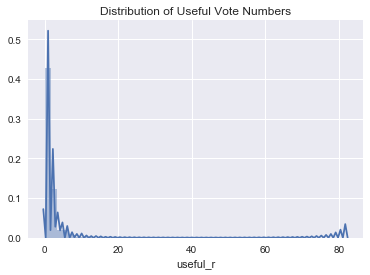

In [58]:
# Distribution of useful votes
sns.distplot(review_4.useful_r)
plt.title('Distribution of Useful Vote Numbers')
#plt.savefig('dist_1.png')
plt.show()

# Useful vote numbers are distributed between 0 and 80 at most.
# Most of the reviews has no useful vote! 
# 1) Make users write more useful reviews
# 2) Make users vote more!

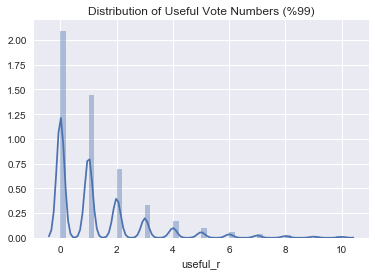

In [59]:
# Filtering outliers to get better graphs
threshold = review_4.useful_r.quantile(q=0.99)
filtered_useful = review_4[review_4.useful_r < threshold]
sns.distplot(filtered_useful.useful_r)
plt.title('Distribution of Useful Vote Numbers (%99)')
#plt.savefig('dist_2.png')
plt.show()

# Text-related Features

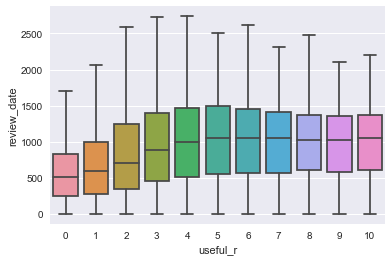

In [60]:
# Freshness of reviews vs. useful_r
sns.boxplot(x='useful_r',y='review_date',data=filtered_useful, showfliers=False)
#plt.savefig('review_date.png')
plt.show()

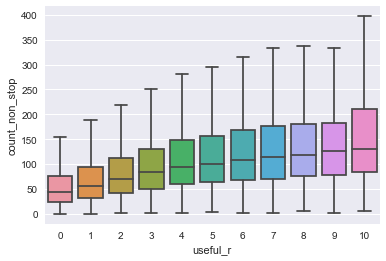

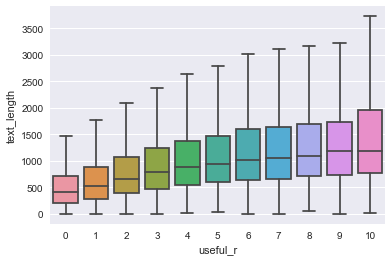

In [61]:
sns.boxplot(x='useful_r',y='count_non_stop',data=filtered_useful, showfliers=False)
#plt.savefig('non_stop.png')
plt.show()

sns.boxplot(x='useful_r',y='text_length',data=filtered_useful, showfliers=False)
#plt.savefig('length.png')
plt.show()

In [62]:
# The reviews having at least 1 useful reviews and 0 reviews.
def is_useful(row):
    if row >= 1:
        return 1
    else:
        return 0

In [63]:
filtered_useful['is_useful'] = filtered_useful['useful_r'].apply(is_useful)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
# Check is_useful column
filtered_useful[['useful_r','is_useful']].sample(5)

,useful_r,is_useful
128966,1,1
5368,1,1
187604,2,1
186990,1,1
119695,1,1


# User-related Features

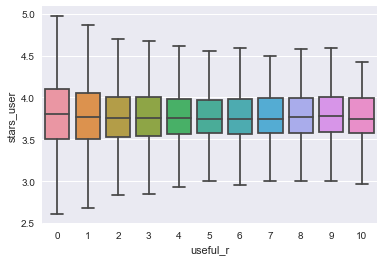

In [65]:
sns.boxplot(y='stars_user',x='useful_r', data=filtered_useful,showfliers=False)
#plt.savefig('stars_user.png')
plt.show()

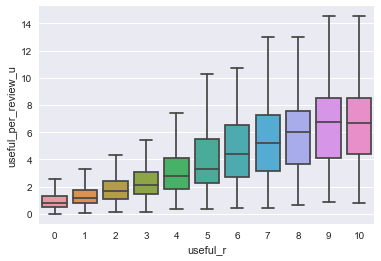

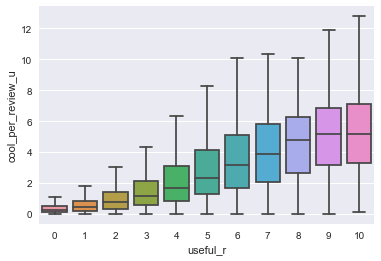

In [68]:
sns.boxplot(y='useful_per_review_u',x='useful_r', data=filtered_useful,showfliers=False)
#plt.savefig('useful_per_review_u.png')
plt.show()
sns.boxplot(y='cool_per_review_u',x='useful_r', data=filtered_useful,showfliers=False)
plt.savefig('cool_per_review_u.png')
plt.show()

# Business-related Features

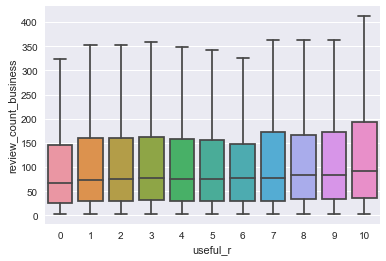

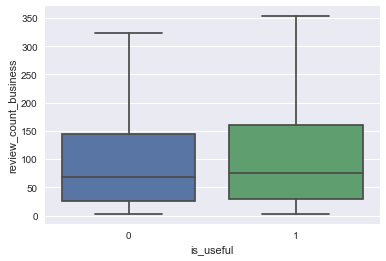

In [69]:
# Review count of a business vs Usefulness
sns.boxplot(x='useful_r',y='review_count_business',data=filtered_useful, showfliers=False)
#plt.savefig('review_count_bus_1.png')
plt.show()

sns.boxplot(x='is_useful',y='review_count_business',data=filtered_useful, showfliers=False)
#plt.savefig('review_count_bus_2.png')
plt.show()

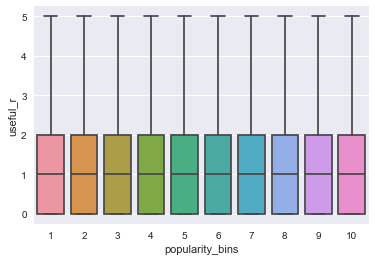

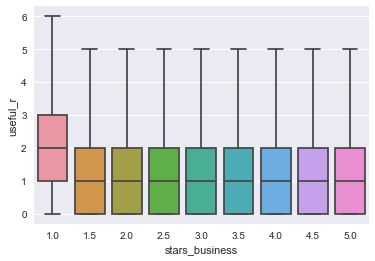

In [70]:
sns.boxplot(y='useful_r',x='popularity_bins', data=filtered_useful, showfliers=False)
#plt.savefig('pop.png')
plt.show()
sns.boxplot(y='useful_r',x='stars_business', data=filtered_useful, showfliers=False)
#plt.savefig('stars_business.png')
plt.show()

In [71]:
review_4.iloc[:5,:20]

,review_date,stars_review,useful_r,useful_r_ratio,review_user_std_dev,count_exclamation,count_question,count_non_stop,text_length,stars_user,review_count_user,popularity_bins,review_count_business,stars_business,"""children's clothing""","""men's clothing""","""women's clothing""",'accessories','active life','adult education'
0,710.0,5,5,0.545455,1.266139,1,0,93,889,3.72,376.0,8,116,4.0,0,0,0,0,0,0
1,955.0,4,0,1.000000,1.266139,2,0,109,1012,3.72,376.0,9,100,3.5,0,0,0,0,0,0
2,486.0,4,3,0.250000,1.266139,0,0,302,2890,3.72,376.0,9,100,4.0,0,0,0,0,0,0
3,831.0,4,1,0.333333,1.266139,1,1,139,1246,3.72,376.0,2,113,3.5,0,0,0,0,0,0
4,1263.0,3,0,1.000000,1.266139,0,0,124,1178,3.72,376.0,8,94,4.0,0,0,0,0,0,0


In [72]:
review_4.iloc[:4,14:-3]

,"""children's clothing""","""men's clothing""","""women's clothing""",'accessories','active life','adult education','adult','advertising','african','airlines',...,'videographers','videos & video game rental','vietnamese','web design','wedding planning','weight loss centers','window washing','windows installation','wine bars','yoga'
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


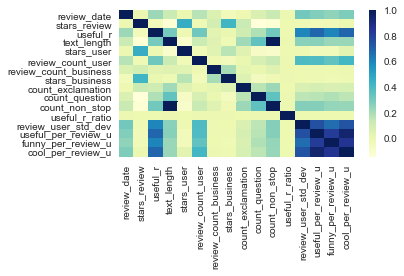

In [73]:
# heatmap of corralation between all values
corrmat = review_3.corr()
sns.heatmap(corrmat, fmt=".1f", cmap="YlGnBu")
plt.tight_layout()
#plt.savefig('heatmap.png')
plt.show() 

# Decision Tree Regressor

In [74]:
X = review_3.drop('useful_r',1)
y = review_3['useful_r']
X_np = np.array(X)
y_np = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.15, random_state=0)
y_actual = y_test
print("Training set size : ", len(X_train))
print("Test set size : ", len(X_test))

Training set size :  170402
Test set size :  30071


In [75]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Mean Squared Error : ', mean_squared_error(y_actual,y_pred))
print('Root of MSE : ', mean_squared_error(y_actual,y_pred)**(1/2))
print('R2 Score : ', r2_score(y_actual,y_pred))

Mean Squared Error :  3.84975557846
Root of MSE :  1.96207940167
R2 Score :  0.237045098218


In [76]:
#param_grid = {'min_samples_split': [2,5, 10, 100, 1000], 'min_samples_leaf': [2,5, 10, 100, 1000],
#              'max_depth':[2,5, 10, 100, 1000]}
param_grid = {'max_depth': [10,100], 'min_samples_leaf': [100,10], 'min_samples_split': [10,100]}
model = GridSearchCV(model,param_grid)
model.fit(X_train ,y_train)
model.best_params_

{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 100}

In [77]:
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train,y_train, test_size=0.15, random_state=0)

In [78]:
model = DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=10, max_depth=100)
model.fit(X_train2, y_train2)
y_pred2= model.predict(X_valid)
print('Mean Squared Error : ', mean_squared_error(y_valid,y_pred2))
print('Root of MSE : ', mean_squared_error(y_valid,y_pred2)**(1/2))
print('R2 Score : ', r2_score(y_valid,y_pred2))

Mean Squared Error :  2.67583242682
Root of MSE :  1.63579718389
R2 Score :  0.500151254256


In [79]:
X_train3 = np.concatenate([X_train2,X_valid])
y_train3 = np.concatenate([y_train2,y_valid])
model.fit(X_train3,y_train3)
y_pred3 = model.predict(X_test)
print('Mean Squared Error : ', mean_squared_error(y_test,y_pred3))
print('Root of MSE : ', mean_squared_error(y_test,y_pred3)**(1/2))
print('R2 Score : ', r2_score(y_test,y_pred3))

Mean Squared Error :  2.54458038726
Root of MSE :  1.59517409309
R2 Score :  0.495708223582


In [80]:
features = sorted(list(zip(X.columns, model.feature_importances_)), key=lambda x:x[1], reverse=True)
df_features = pd.DataFrame(features)
df_features

,0,1
0,cool_per_review_u,0.556568
1,useful_per_review_u,0.123754
2,review_user_std_dev,0.067976
3,review_date,0.065730
4,count_non_stop,0.040740
5,text_length,0.035572
6,review_count_business,0.025661
7,stars_review,0.019868
8,review_count_user,0.018422
9,stars_user,0.012521


# Decision Tree Regressor with Business Categories

In [81]:
review_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200473 entries, 0 to 229906
Columns: 746 entries, review_date to cool_per_review_u
dtypes: category(1), float64(9), int64(736)
memory usage: 1.1 GB


In [82]:
X = review_4.drop('useful_r',1)
y = review_4['useful_r']
X_np = np.array(X)
y_np = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.15, random_state=0)
y_actual = y_test
print("Training set size : ", len(X_train))
print("Test set size : ", len(X_test))

Training set size :  170402
Test set size :  30071


In [83]:
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('Mean Squared Error : ', mean_squared_error(y_actual,y_pred))
print('Root of MSE : ', mean_squared_error(y_actual,y_pred)**(1/2))
print('R2 Score : ', r2_score(y_actual,y_pred))

Mean Squared Error :  3.6930930132
Root of MSE :  1.92174218177
R2 Score :  0.26809290623


In [84]:
#param_grid = {'min_samples_split': [2,5, 10, 100, 1000], 'min_samples_leaf': [2,5, 10, 100, 1000],
#              'max_depth':[2,5, 10, 100, 1000]}
param_grid = {'max_depth': [10,100], 'min_samples_leaf': [100,10], 'min_samples_split': [10,100]}
model = GridSearchCV(model,param_grid)
model.fit(X_train ,y_train)
model.best_params_

{'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 100}

In [85]:
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train,y_train, test_size=0.15, random_state=0)

In [86]:
model = DecisionTreeRegressor(min_samples_split=10, min_samples_leaf=10, max_depth=100)
model.fit(X_train2, y_train2)
y_pred2= model.predict(X_valid)
print('Mean Squared Error : ', mean_squared_error(y_valid,y_pred2))
print('Root of MSE : ', mean_squared_error(y_valid,y_pred2)**(1/2))
print('R2 Score : ', r2_score(y_valid,y_pred2))

Mean Squared Error :  2.67075090164
Root of MSE :  1.63424321985
R2 Score :  0.501100489328


In [87]:
X_train3 = np.concatenate([X_train2,X_valid])
y_train3 = np.concatenate([y_train2,y_valid])
model.fit(X_train3,y_train3)
y_pred3 = model.predict(X_test)
print('Mean Squared Error : ', mean_squared_error(y_test,y_pred3))
print('Root of MSE : ', mean_squared_error(y_test,y_pred3)**(1/2))
print('R2 Score : ', r2_score(y_test,y_pred3))

Mean Squared Error :  2.56402917579
Root of MSE :  1.6012586224
R2 Score :  0.491853810427


In [88]:
features = sorted(list(zip(X.columns, model.feature_importances_)), key=lambda x:x[1], reverse=True)
df_features = pd.DataFrame(features)
df_features.head()

,0,1
0,cool_per_review_u,0.572790
1,useful_per_review_u,0.106852
2,review_user_std_dev,0.067530
3,review_date,0.065151
4,count_non_stop,0.040749


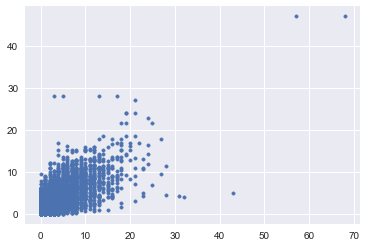

In [89]:
plt.scatter(y_test, y_pred3,marker='.')
#plt.savefig('regression_result.png')
plt.show()

# Decision Tree Classifier with 'Useful_r' Buckets

In [90]:
review_5 = review_4.copy()

In [91]:
X = review_5.drop('useful_r',1)
y = review_5['useful_r']
#y = pd.cut(y, bins=5)

In [92]:
bins = [-0.1, 0.1, 5, 15, 30, 50, 100]
labels = [0,1,2,3,4,5]
y_2 = pd.cut(y, bins=bins)
y_3 = pd.cut(y, bins=bins, labels=labels)

In [93]:
y_2.value_counts() # it will be a classification problem

(0.1, 5.0]       108756
(-0.1, 0.1]       83042
(5.0, 15.0]        8095
(15.0, 30.0]        548
(30.0, 50.0]         22
(50.0, 100.0]        10
Name: useful_r, dtype: int64

In [94]:
y_3.value_counts() # it will be a regression problem

1    108756
0     83042
2      8095
3       548
4        22
5        10
Name: useful_r, dtype: int64

In [95]:
X_np = np.array(X)
y_3_np = np.array(y_3)
X_train, X_test, y_train, y_test = train_test_split(X_np, y_3_np, test_size=0.15, random_state=0)
y_actual = y_test
print("Training set size : ", len(X_train))
print("Test set size : ", len(X_test))

Training set size :  170402
Test set size :  30071


In [96]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_actual, y_pred)

0.62618469621894846

In [97]:
# param_grid = {'max_depth': [10,100], 'min_samples_leaf': [100,10], 'min_samples_split': [10,100]}
param_grid = {'max_depth': [10], 'min_samples_leaf': [100], 'min_samples_split': [10]}
model = GridSearchCV(model,param_grid)
model.fit(X_train ,y_train)
model.best_params_

{'max_depth': 10, 'min_samples_leaf': 100, 'min_samples_split': 10}

In [98]:
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train,y_train, test_size=0.15, random_state=0)

In [99]:
model = DecisionTreeClassifier(min_samples_split=10, min_samples_leaf=100, max_depth=10)
model.fit(X_train2, y_train2)
y_pred2= model.predict(X_valid)
accuracy_score(y_valid, y_pred2)

0.68635812370408045

In [100]:
X_train3 = np.concatenate([X_train2,X_valid])
y_train3 = np.concatenate([y_train2,y_valid])
model.fit(X_train3,y_train3)
y_pred3 = model.predict(X_test)
accuracy_score(y_actual, y_pred3)

0.68680788799840375

In [101]:
confusion_matrix(y_actual, y_pred3)

array([[ 7696,  4726,     4,     0,     0,     0],
       [ 3635, 12471,   240,     3,     0,     0],
       [    6,   726,   469,     2,     0,     0],
       [    0,    20,    51,    17,     0,     0],
       [    0,     2,     1,     0,     0,     0],
       [    0,     1,     1,     0,     0,     0]])

In [102]:
print(classification_report(y_actual, y_pred3))

             precision    recall  f1-score   support

          0       0.68      0.62      0.65     12426
          1       0.69      0.76      0.73     16349
          2       0.61      0.39      0.48      1203
          3       0.77      0.19      0.31        88
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         2

avg / total       0.69      0.69      0.68     30071



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [103]:
features = sorted(list(zip(X.columns, model.feature_importances_)), key=lambda x:x[1], reverse=True)
df_features = pd.DataFrame(features)
df_features

,0,1
0,useful_per_review_u,0.524248
1,cool_per_review_u,0.209570
2,review_date,0.121847
3,review_user_std_dev,0.051389
4,count_non_stop,0.036831
5,review_count_user,0.016238
6,stars_review,0.014313
7,text_length,0.010739
8,review_count_business,0.006591
9,funny_per_review_u,0.002356


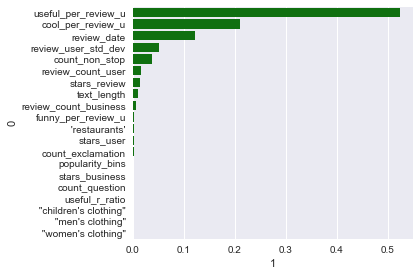

In [104]:
#sns.set(font_scale=1.5)
df_features_most_important = df_features.iloc[:20]
sns.barplot(x=1,y=0,data=df_features_most_important, color='green')
sns.despine()
plt.rcParams['figure.figsize']=(7,12)
plt.tight_layout()
plt.savefig('dec_tree_imp_features.png')
plt.show()

# Random Forests Classifier

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_np, y_3_np, test_size=0.15, random_state=0)
y_actual = y_test
print("Training set size : ", len(X_train))
print("Test set size : ", len(X_test))

Training set size :  170402
Test set size :  30071


In [106]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy_score(y_actual, y_pred)

0.65757706760666423

In [107]:
# param_grid = {'n_estimators': [10,20], 'max_features': ['auto','sqrt','log2'], 'min_samples_split': [2,3,5]}
param_grid = {'n_estimators': [20], 'max_features': ['sqrt'], 'min_samples_split': [5]}
model = GridSearchCV(model,param_grid)
model.fit(X_train ,y_train)
model.best_params_

{'max_features': 'sqrt', 'min_samples_split': 5, 'n_estimators': 20}

In [108]:
X_train2, X_valid, y_train2, y_valid = train_test_split(X_train,y_train, test_size=0.15, random_state=0)

In [109]:
model = RandomForestClassifier()
model.fit(X_train2, y_train2)
y_pred2= model.predict(X_valid)
accuracy_score(y_valid, y_pred2)

0.65455185634364854

In [110]:
X_train3 = np.concatenate([X_train2,X_valid])
y_train3 = np.concatenate([y_train2,y_valid])
model.fit(X_train3,y_train3)
y_pred3 = model.predict(X_test)
accuracy_score(y_actual, y_pred3)

0.66206644275215321

In [111]:
confusion_matrix(y_actual, y_pred3)

array([[ 8235,  4183,     8,     0,     0,     0],
       [ 4922, 11223,   204,     0,     0,     0],
       [   21,   732,   446,     4,     0,     0],
       [    1,    19,    63,     5,     0,     0],
       [    0,     2,     1,     0,     0,     0],
       [    0,     2,     0,     0,     0,     0]])

In [112]:
print(classification_report(y_actual, y_pred3))

             precision    recall  f1-score   support

          0       0.62      0.66      0.64     12426
          1       0.69      0.69      0.69     16349
          2       0.62      0.37      0.46      1203
          3       0.56      0.06      0.10        88
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         2

avg / total       0.66      0.66      0.66     30071



/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [113]:
features = sorted(list(zip(X.columns, model.feature_importances_)), key=lambda x:x[1], reverse=True)
df_features = pd.DataFrame(features)
df_features

,0,1
0,useful_per_review_u,0.108358
1,cool_per_review_u,0.080562
2,funny_per_review_u,0.072615
3,review_user_std_dev,0.071686
4,review_date,0.071396
5,text_length,0.061717
6,count_non_stop,0.059481
7,review_count_user,0.052696
8,stars_user,0.047257
9,review_count_business,0.046735


In [ ]:
sns.set(font_scale=1.5)
df_features_most_important = df_features.iloc[:20]
df_features_most_important.loc[:,1] = df_features_most_important.loc[:,1]*-1 #taking negatives(only to use as presentation visual)
ax = sns.barplot(x=1,y=0,data=df_features_most_important, color='green')
ax.yaxis.tick_right()
plt.rcParams['figure.figsize']=(10,7)
plt.tight_layout()
plt.savefig('rand_for_imp_features.png')
plt.show()